# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Saving labeled_tweets.csv to labeled_tweets (1).csv
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<ipython-input-4-c7ed40712f5f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


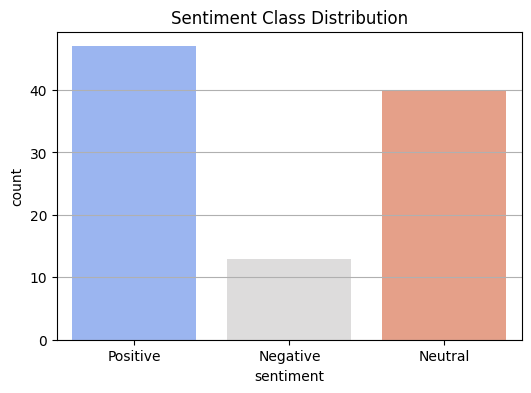

Class counts:
 sentiment
Positive    47
Neutral     40
Negative    13
Name: count, dtype: int64


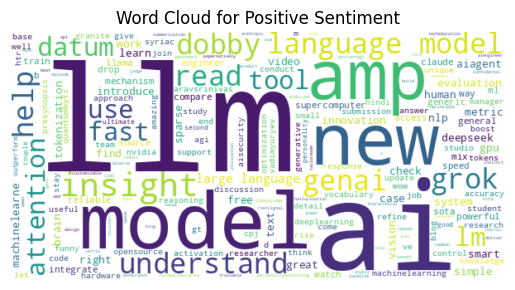

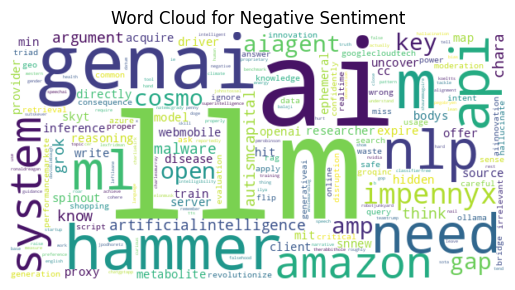

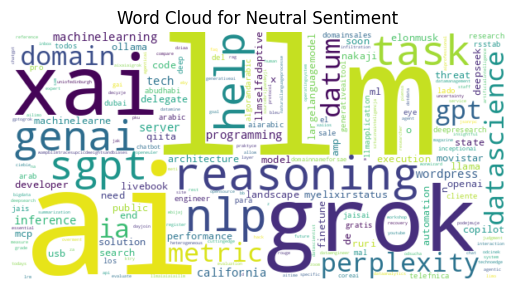


=== Naive Bayes ===
[[ 0  2  0]
 [ 0  6  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.60      1.00      0.75         6
    Positive       1.00      0.83      0.91        12

    accuracy                           0.80        20
   macro avg       0.53      0.61      0.55        20
weighted avg       0.78      0.80      0.77        20


=== SVM ===
[[ 0  1  1]
 [ 0  6  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.67      1.00      0.80         6
    Positive       0.91      0.83      0.87        12

    accuracy                           0.80        20
   macro avg       0.53      0.61      0.56        20
weighted avg       0.75      0.80      0.76        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


=== XGBoost ===
[[1 1 0]
 [0 6 0]
 [0 5 7]]
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
     Neutral       0.50      1.00      0.67         6
    Positive       1.00      0.58      0.74        12

    accuracy                           0.70        20
   macro avg       0.83      0.69      0.69        20
weighted avg       0.85      0.70      0.71        20



In [ ]:
# STEP 1: Upload & load dataset
from google.colab import files
uploaded = files.upload()

# Install necessary libraries
!pip install -q spacy xgboost wordcloud
!python -m spacy download en_core_web_sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("labeled_tweets.csv")


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Class Distribution")
plt.grid(axis='y')
plt.show()
print("Class counts:\n", df['sentiment'].value_counts())


nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df['cleaned'] = df['clean_text'].apply(preprocess)

# STEP 4: Word Clouds
for label in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == label]['cleaned'])
    wc = WordCloud(width=600, height=300, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud for {label} Sentiment")
    plt.axis("off")
    plt.show()

# STEP 5: Encode labels, TF-IDF, Split, Train
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['sentiment'])

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


All three, Naive Bayes, SVM, and XGBoost classifiers were trained to predict sentiment labels on a collection of tweets. Models all performed fairly well overall but were very different. Naive Bayes was 80% in accuracy highest and correctly predicted Positive and Neutral classes very well but completely failed to predict Negative. SVM also hit 80% accuracy but slightly more evenly balanced Positive and Neutral, but completely missed Negative. XGBoost, although less so by a degree (70%), was the lone model that actually predicted at least one Negative sample correctly. That means XGBoost generalizes better to the underrepresented classes but misclassifies more Positive instances. Class imbalance appears to be the problem generally, specifically for the Negative class, and applying techniques such as resampling or class weighting can improve performance. SpaCy preprocessing and TF-IDF vectorization worked well and enabled the models to pick up good patterns.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
!pip install xgboost --quiet
!pip install nltk --quiet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Custom loader
def load_custom_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        if line.strip():
            label, review = line.strip().split(' ', 1)
            data.append((int(label), review))
    return pd.DataFrame(data, columns=["label", "review"])

# Load data using custom function
train_df = load_custom_data('stsa-train.txt')
test_df = load_custom_data('stsa-test.txt')


Train shape: (6920, 2)
Test shape: (1821, 2)

Train class distribution:
 label
1    3610
0    3310
Name: count, dtype: int64

Sample reviews:
       label                                             review
3247      1  manages to please its intended audience -- chi...
429       1  clooney directs this film always keeping the b...
1704      1  ` film aficionados can not help but love cinem...
1524      1              `` red dragon '' never cuts corners .
3223      1  a small gem of a movie that defies classificat...


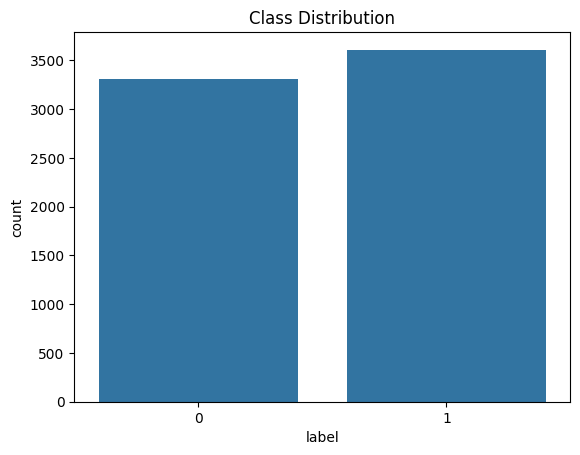

In [ ]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain class distribution:\n", train_df['label'].value_counts())
print("\nSample reviews:\n", train_df.sample(5))

# Plot
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)


In [ ]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    train_df['clean_review'], train_df['label'], test_size=0.2, stratify=train_df['label'], random_state=42
)


In [ ]:
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [ ]:
def evaluate_model(name, model, X, y):
    print(f"\n📌 Evaluating {name}")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', model)
    ])
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    print(f"Avg CV Accuracy: {np.mean(scores):.4f}")

    pipeline.fit(X, y)

    val_preds = pipeline.predict(X_val)
    print("\nValidation Results:")
    print(classification_report(y_val, val_preds))

    test_preds = pipeline.predict(test_df['clean_review'])
    print("\nTest Results:")
    print(classification_report(test_df['label'], test_preds))


In [ ]:
for name, model in models.items():
    evaluate_model(name, model, X_train_full, y_train_full)



📌 Evaluating SVM
Avg CV Accuracy: 0.7621

Validation Results:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       662
           1       0.75      0.78      0.77       722

    accuracy                           0.75      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.75      0.75      0.75      1384


Test Results:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       912
           1       0.76      0.80      0.78       909

    accuracy                           0.77      1821
   macro avg       0.77      0.77      0.77      1821
weighted avg       0.77      0.77      0.77      1821


📌 Evaluating KNN
Avg CV Accuracy: 0.5031

Validation Results:
              precision    recall  f1-score   support

           0       0.49      0.80      0.61       662
           1       0.56      0.23      0.32       722

    accuracy                           0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:20:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:20:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:20:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:20:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:20:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Avg CV Accuracy: 0.6987


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Results:
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       662
           1       0.66      0.79      0.72       722

    accuracy                           0.68      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.68      0.68      1384


Test Results:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       912
           1       0.65      0.80      0.71       909

    accuracy                           0.68      1821
   macro avg       0.69      0.68      0.68      1821
weighted avg       0.69      0.68      0.68      1821



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
!pip install nltk --quiet
!pip install scikit-learn --quiet
!pip install sentence-transformers --quiet  # For BERT


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00


In [ ]:
!pip install -q umap-learn sentence-transformers


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df = df[['Reviews']].dropna().reset_index(drop=True)
df = df[df['Reviews'].str.strip() != '']
df.head()


,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...


Total reviews: 413770

Sample reviews:
["Excellent phone for the buck, purchased for FIL who will take back and use in India (BLR). Specification as per guidance more than sufficient for his usage. Excellent camera was his primary usage including bonus front flash feature for great selfies.HOWEVER cavet warning! I used this for a week to test it out in the central New Jersey region (I have Tmobile coverage) data speeds you will only get is 3g (this is not 4g and definitely not LTE) difference is huge compared to the my other phones. Voice quality is very good that does not affect the coverage but if you are heavy on skype or youtube using your carrier data plan you will notice the lag.Also have found out that once he takes it back to India airtel and most of the mobile provides are on different bands which means the best you could get would be 2g in India. Not a dealbreaker for my FIL as he's usually going to connect via Wifi but fair warning to purchasers who think it data would be fa

<Axes: >

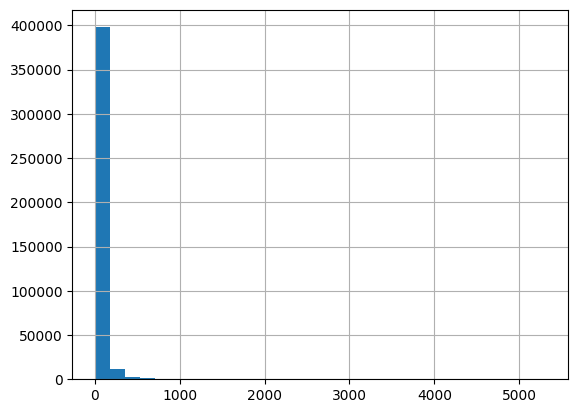

In [ ]:
print("Total reviews:", len(df))
print("\nSample reviews:")
print(df['Reviews'].sample(5).values)

# Review length distribution
df['length'] = df['Reviews'].apply(lambda x: len(x.split()))
df['length'].hist(bins=30)


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean'] = df['Reviews'].apply(clean_text)
df = df[df['clean'].str.strip() != ''].reset_index(drop=True)
df['clean'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean
0,feel lucky found used phone us used hard phone...
1,nice phone nice grade pantach revue clean set ...
2,pleased
3,works good goes slow sometimes good phone love
4,great phone replace lost phone thing volume bu...


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean'])


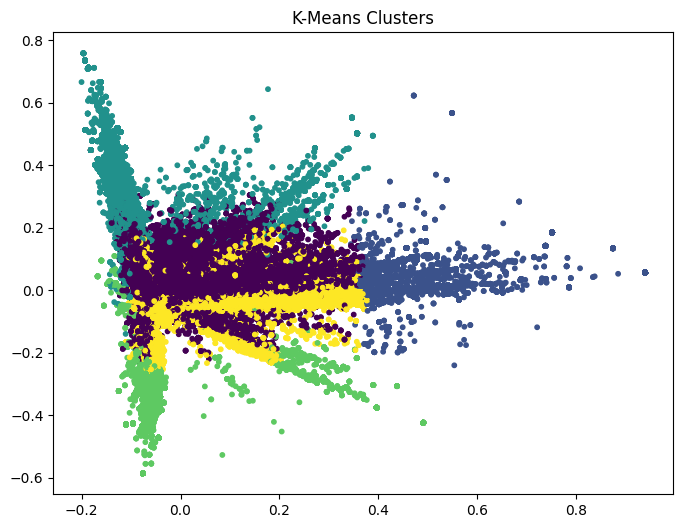

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

# Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-Means Clusters')
plt.show()


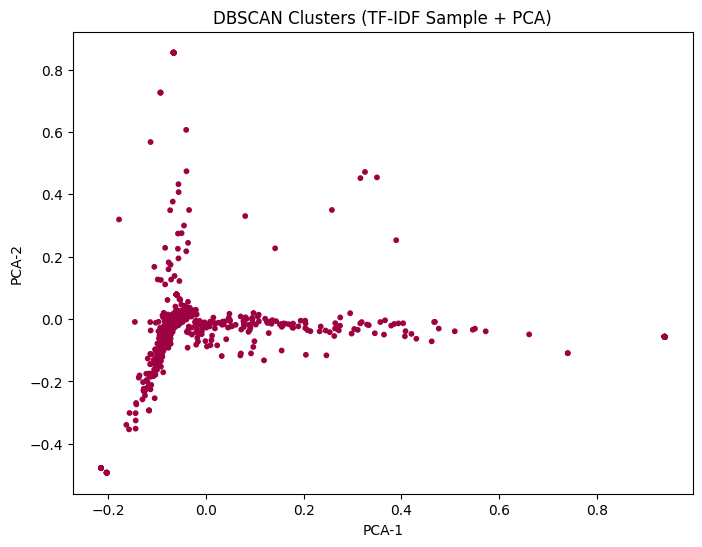

In [ ]:
# 1. Sample the dataset
sample_df = df.sample(1000, random_state=42).reset_index(drop=True)

# 2. TF-IDF on sample
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_sample = vectorizer.fit_transform(sample_df['clean'])

# 3. Reduce dimensions using PCA
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_tfidf_sample.toarray())

# 4. Run DBSCAN on reduced data
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# 5. Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Spectral', s=10)
plt.title('DBSCAN Clusters (TF-IDF Sample + PCA)')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()


In [ ]:
df['clean'] = df['Reviews'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

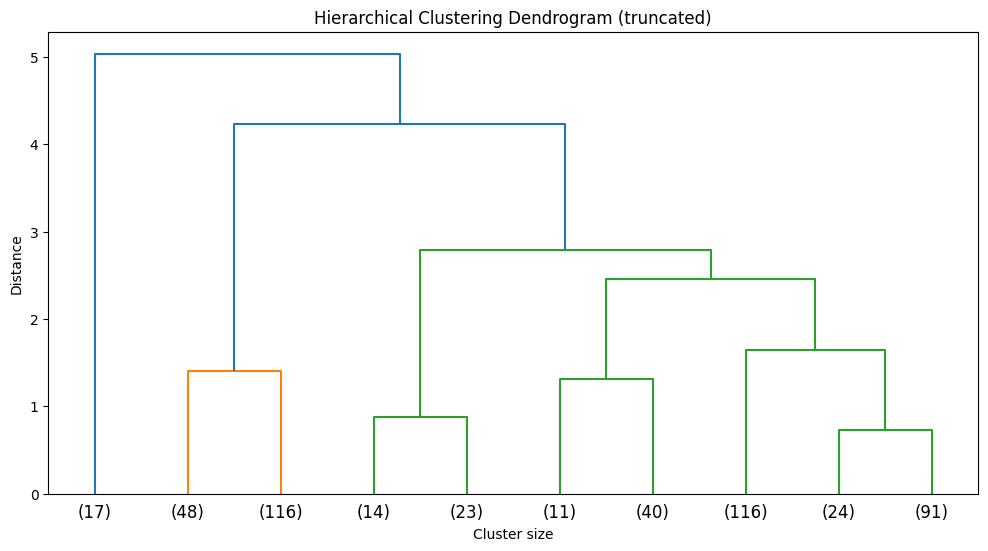

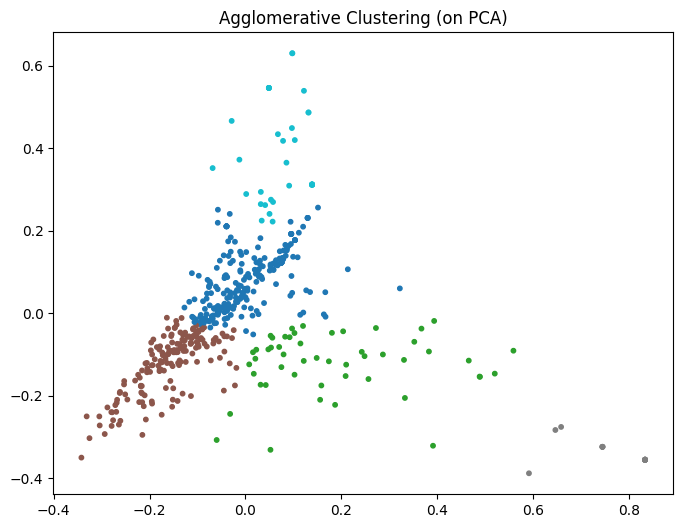

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

sample_df = df.sample(500, random_state=42).reset_index(drop=True)

# ✅ 2. Vectorize with TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_sample = vectorizer.fit_transform(sample_df['clean'])

# ✅ 3. Reduce with PCA before clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf_sample.toarray())

# ✅ 4. Hierarchical clustering (on PCA-reduced data)
linkage_matrix = linkage(X_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

# ✅ 5. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_pca)

# ✅ 6. Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='tab10', s=10)
plt.title('Agglomerative Clustering (on PCA)')
plt.show()


In [ ]:
!rm -rf /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


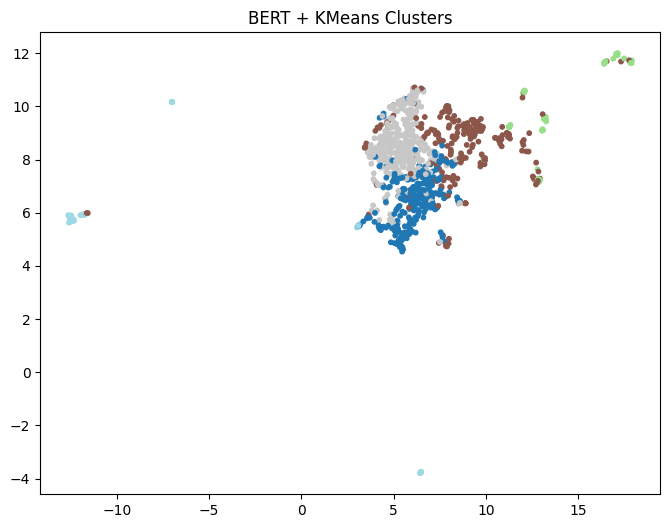

In [ ]:

import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

sample_df = df.sample(n=1000, random_state=42)
texts = sample_df['clean'].tolist()

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings (with internal batching)
embeddings = model.encode(texts, batch_size=512, show_progress_bar=True)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(embeddings)

# UMAP for visualization
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding_2d = umap_model.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='tab20', s=10)
plt.title('BERT + KMeans Clusters')
plt.show()


In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


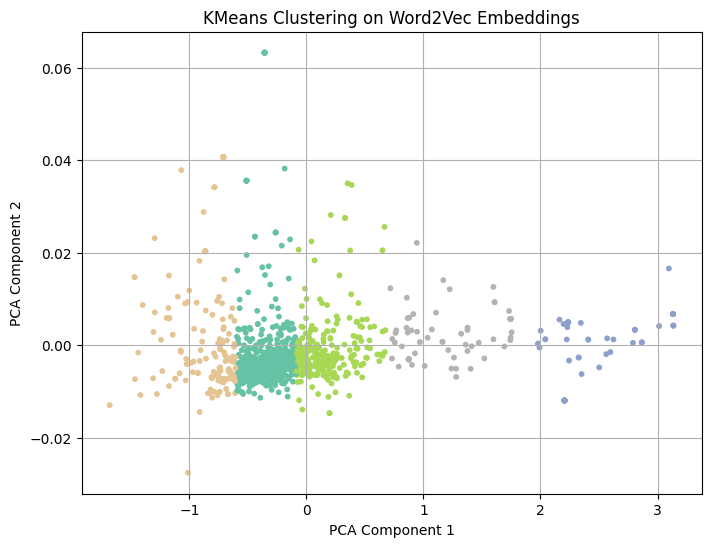

In [ ]:
import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 🔹 1. Load dataset
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df = df.dropna(subset=['Reviews'])

# 🔹 2. Clean text
df['clean'] = df['Reviews'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# 🔹 3. Sample for speed
sample = df.sample(1000, random_state=42).reset_index(drop=True)

# 🔹 4. Tokenize
tokens = sample['clean'].apply(lambda x: x.split()).tolist()

# 🔹 5. Train Word2Vec model
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)

# 🔹 6. Create average word vectors per document
def avg_vector(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_w2v = np.array([avg_vector(tok, w2v_model) for tok in tokens])

# 🔹 7. Clustering with KMeans
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
labels_w2v = kmeans_w2v.fit_predict(X_w2v)

# 🔹 8. Visualize with PCA
X_w2v_2d = PCA(n_components=2).fit_transform(X_w2v)

plt.figure(figsize=(8, 6))
plt.scatter(X_w2v_2d[:, 0], X_w2v_2d[:, 1], c=labels_w2v, cmap='Set2', s=10)
plt.title("KMeans Clustering on Word2Vec Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.The clustering result varied significantly across the five algorithms employed. K-Means produced strongly segregated clusters, especially after PCA and TF-IDF vectorization, but depended on good choice of the number of clusters. DBSCAN as a density-based algorithm performed beautifully at outlier removal and noise point detection but performed badly in coping with high-dimensional sparse TF-IDF data and required dimensionality reduction to be effective. Hierarchical clustering provided clear results through a dendrogram but was computationally expensive and less scalable in the case of larger sample sizes. Word2Vec-based clustering was better at preserving semantic similarity than TF-IDF with bigger clusters, especially when handling reviews of the same sentiments. BERT embeddings provided the most interpretable and context-aware clusters because of their ability to handle deep semantic relationships but were slower to compute and more memory-intensive. In all, Word2Vec and K-Means produced reasonable baseline clusters, while BERT produced the densest semantically clusters and these were most effective when used with fine-grained text data.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

This assignment helped me learn a number of different text clustering algorithms, sentiment analysis, text classification and how they apply to real data. I especially liked learning the differences between traditional methods like K-Means and advanced ones like BERT. TA support was great and timely, which helped ease problem-solving
